# DSP1: Assignment 2

### Deadline: February 13 (until 23:59)


**Instructions:** All answers should be filled in the notebook and then submitted to Moodle. For theoretical question you can use markdown and LaTeX. Name of notebook should be in following format:
 - Name_group_Assignment2.ipynb (ex. Tony_Stark_2009_Assignment2.ipynb)
 - Try to use fewer cells for compilation (for example, you can use print for several answers, instead of printing each answer on a separate cell)
 - **PLEASE:** submit only one jupyter notebook (no zip or csv files) and with your names as in the instruction. Ohterwise, there will be punishment for 1 point.

## Q1 (20%)
We have a sample data about GPA of Software Engineering group students along with corresponding  weekly self studying hours, which are presented in the lists below. Consider the relationship between GPA and weekly self studying hours. Based on these data, do the following:

1. Which one is the independent variable and which is the dependent variable?
2. Plot a scatter diagram. Put labels correctly. Describe the relationship based on the obtained graph.
3. Build a function for calculating sample correlation coefficient (it should take only two lists as an input). Then calculate this coefficient.
4. Use numpy's method to calculate correlation coefficient, and compare it with your result in Task 3. Give comment.
5. Is the obtained correlation coefficient value consistent with your description in Task 2. Give comment.

*Note: do not use too many cells for one task. For theoretical question use markdown cells.*

In [1]:
gpa_se = [3.54, 3.17, 2.68, 3.08, 3.43, 3.11, 3.33, 2.70, 3.29, 3.94, 3.50, 3.07, 3.05,
          3.33, 3.37, 3.25, 2.90, 3.05, 3.55, 2.63, 3.03, 2.94, 2.80, 3.05, 2.91, 3.22,
          3.21, 3.09, 3.09, 3.06, 3.29, 3.12, 2.90, 3.42, 3.47, 2.99, 3.35, 2.94, 3.03,
          2.71, 3.09, 3.51, 3.73, 2.92, 3.47, 3.14, 3.19, 3.23, 2.35, 3.06, 3.71, 3.44]

In [2]:
hours_se = [15.9, 15.0, 10.2, 12.2, 16.0, 16.2, 18.1, 7.7, 12.2, 22.1, 17.8, 13.8, 14.9,
            15.7, 16.8, 15.7, 10.4, 14.9, 17.5, 11.8, 12.2, 12.7, 12.3, 12.0, 13.0, 15.3, 
            15.4, 13.8, 14.9, 12.6, 15.5, 16.6, 12.6, 16.6, 16.3, 14.5, 18.8, 15.1, 15.9,  
            13.6, 12.0, 19.3, 21.6, 11.5, 18.5, 16.6, 14.8, 15.9, 8.7, 10.1, 20.1, 14.6]

### Q1.1 
So, **the hours_se is the independent variable**, because it influences gpa_se. **The gpa_se is the dependent variable**, because we are trying to predict it.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

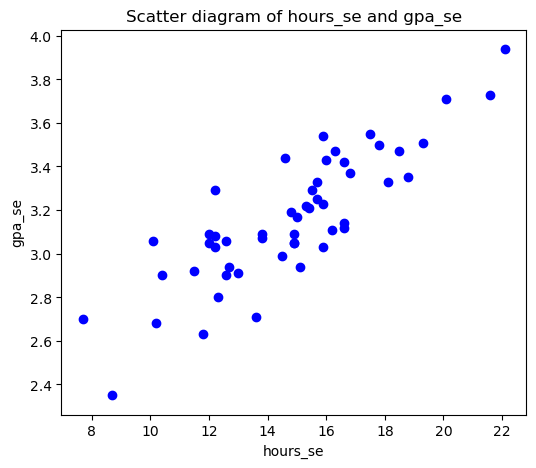

In [4]:
#Q1.2
plt.figure(figsize=(6,5))
plt.scatter(hours_se, gpa_se, c='blue', marker='o') 
plt.xlabel('hours_se')
plt.ylabel('gpa_se')
plt.title('Scatter diagram of hours_se and gpa_se')
plt.show()

The diagram above shows that the hours_se affects to the GPA. And also, we can say that it is a positively correlated.

In [5]:
#Q1.3
def correlation_coefficient(x,y):
    n = len(x)
    coef = 0
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    
    sum_xx = np.sum([i*i for i in x]) 
    sum_yy = np.sum([i*i for i in y]) 
    sum_xy = np.sum([x[i]*y[i] for i in range(len(x))])
    coef = (sum_xy - sum_x*sum_y/n)/np.sqrt((sum_xx - sum_x*sum_x/n)*(sum_yy - sum_y*sum_y/n))
    return coef
correlation_coefficient(hours_se, gpa_se)

0.8489926548857274

In [6]:
#Q1.4
np.corrcoef(hours_se, gpa_se)[0][1]

0.8489926548857235

The results are looked like the same, they have the minimum difference. It shows the strongly, positive linear relationship.

### Q1.5
The obtained correlation coefficient value consistent with your description in Task 2. They both shows the  strong, positive and linear relationship between hours_se and gpa_se.

## Q2 (20%)
Now, continuing the situation from Q1, do the following tasks:

1. Build a function to calculate a slope of the model (it should take only two lists as an input). Calculate it.
2. Cacluate a y-intercept.
3. Show the equation for the least squares regression line. 
4. Derive this equation using some python's package. Compare results with Task 3.
5. Interpret slope and intercept in the context of our problem.
6. Plot a scatter diagram and draw the line of best fit.
7. Predict GPA for a student that spends 19 hours on self studying every week. 
*Note: do not use too many cells for one task. For theoretical question use markdown cells.*

In [7]:
#Q2.1
def calc_slope(x, y):
    n = len(x)
    slope = 0
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum([i*i for i in x]) 
    sum_xy = np.sum([x[i]*y[i] for i in range(len(x))])
    slope = (sum_xy - sum_x*sum_y/n)/(sum_xx - sum_x*sum_x/n)
    return slope
calc_slope(hours_se, gpa_se)

0.08444862472847693

In [8]:
#Q2.2
slope = calc_slope(hours_se, gpa_se)
intercept = np.sum(gpa_se)/len(hours_se) - slope*np.sum(hours_se)/len(hours_se)
print(np.round(intercept, 4))

1.9144


### Q2.3
The equation for regression line is:
$ \hat{y} = 1.9 + 0.084x$

In [9]:
#Q2.4
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(hours_se, gpa_se)

print("y = " + str(np.round(slope, 4)), "+", str(np.round(intercept, 1))+"x")

y = 0.0844 + 1.9x


### Q2.5
For the **intercept** - expect the GPA rate to be 1.9 when the hours_se is zero.

For the **slope** - the GPA rate will increase, on average for 0.084 units when the hours_se increases by one.

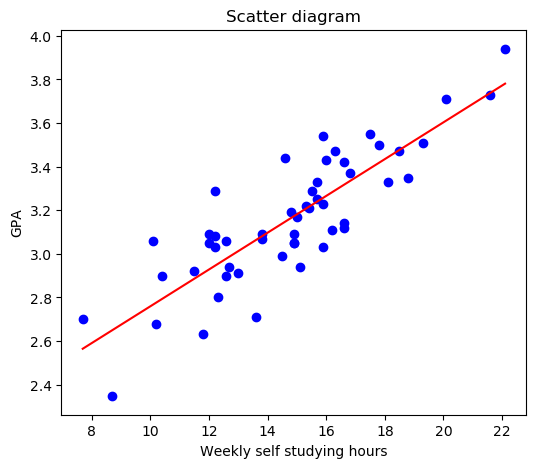

In [10]:
#Q2.6
X = np.array(hours_se)
y = np.array(gpa_se)
y_pred = intercept + slope * X
plt.figure(figsize=(6,5))
plt.scatter(X, y, c='blue', marker='o') 
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.xlabel('Weekly self studying hours')
plt.ylabel('GPA')
plt.title('Scatter diagram')
plt.show()

### Q2.7
**The predicted GPA** for 19 hours on self studying every week is **3.496**.

In [11]:
prediction = 1.9 + 0.084 * 19
prediction

3.496

## Q3 (20%)
Mostly, people believe that more self studying hours for a student will result in higher GPA for him. Please, find if there is evidence for this meaning. Please describe each step of the solution.

*Note: you will get full mark only in case of proper description of your solution.*

In [12]:
#THEORETICAL PART - take from website, then delete this cell
#https://online.stat.psu.edu/stat501/lesson/1/1.9
#H0: hours_se and gpa_se hasn't any relationship
#H1: there is linear relationship between hours_se and gpa_se

In [13]:
from scipy import stats
se = 0
x = hours_se
y = gpa_se
n = len(x)
mean = np.mean(x)

for i in range(n):
    se = se + (x[i] - mean)**2
SE = np.sqrt(np.std(x)**2/se) 
t_st = slope/SE
t_st

0.6089676932018739

In [14]:
for i in range(n):
    sum_x = sum_x2 = 0
    sum_y = sum_y2 = sum_xy = 0
    sum_x = np.sum(x)
    sum_xx = np.sum([i*i for i in x]) 
    sum_y = np.sum(y)
    sum_yy = np.sum([i*i for i in y]) 
    sum_xy = np.sum([x[i]*y[i] for i in range(len(x))])
    
r = (n * sum_xy - sum_x * sum_y)/np.sqrt((n * sum_xx - sum_x**2)*(n * sum_yy - sum_y**2))

t_st2 = (r * np.sqrt(n - 2))/np.sqrt(1 - r**2)
t_st2

11.361150319234552

In [15]:
t_st, p = stats.ttest_ind(x, y)

if p < 0.05:
    print("Null hypothesis is rejected.")
else:
    print("Null hypothesis is accepted.")

Null hypothesis is rejected.


In [16]:
t_st2, p = stats.ttest_ind(x, y)

if p < 0.05:
    print("Null hypothesis is rejected.")
else:
    print("Null hypothesis is accepted.")

Null hypothesis is rejected.


### According to [1], calculation of confidence interval directly with Pearson r is complicated due to the fact that it is not normally distributed. The following steps are needed:

#### 1, Convert r to z',
#### 2, Calculate the z' confidence interval. The sampling distribution of z' is approximately normally distributed and has standard error of 1/sqrt(n-3).
#### 3, Convert the confidence interval back to r.

In [17]:
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

In [18]:
import math
r_confidence_interval(r,0.05,n)

(0.7498179259612268, 0.9108563357045119)

## Q4 (20%)
Take Credit.csv dataset to build regression model that predicts Balance based on two any independent variables, but one  should be numerical and one categorical. Firstly build such model with statsmodels package, and then do that with sklearn.On both approaches show obtained intercepts, coefficients (slopes), correlation coefficients.
*Hint: for sklearn part it will require some self study.*


*Note: you will get full mark only in case of proper description of your solution.*

In [19]:
# Please, write your code here
credit=pd.read_csv('Credit.csv')
credit=pd.get_dummies(credit,columns=['Married'],drop_first=True)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Ethnicity,Balance,Married_Yes
0,14.891,3606,283,2,34,11,Male,No,Caucasian,333,1
1,106.025,6645,483,3,82,15,Female,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,Asian,964,0
4,55.882,4897,357,2,68,16,Male,No,Caucasian,331,1
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Caucasian,560,1
396,13.364,3838,296,5,65,17,Male,No,African American,480,0
397,57.872,4171,321,5,67,12,Female,No,Caucasian,138,1
398,37.728,2525,192,1,44,13,Male,No,Caucasian,0,1


In [20]:
import statsmodels.api as sm

x=credit[['Income','Married_Yes']]
y=credit['Balance']
x = sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     54.52
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.20e-21
Time:                        17:03:25   Log-Likelihood:                -2970.8
No. Observations:                 400   AIC:                             5948.
Df Residuals:                     397   BIC:                             5960.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         258.8819     41.431      6.248      0.000     177.430     340.334
Income          6.0587      0.580     10.441      0.000       4.918       7.199
Married_Yes   -20.9546     41.926     -0.500      0.617    -103.379      61.470
==============================================================================
Omnibus:                       44.240   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.104
Skew:                           0.380   Prob(JB):                     2.61e-05
Kurtosis:                       2.170   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
predict=model.predict(x)
pd.DataFrame(predict)

,0
0,328.147426
1,880.301284
2,892.579853
3,1161.168225
4,576.499729
...,...
395,311.213350
396,339.850418
397,588.556548
398,466.510031


In [22]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

re = linear_model.LinearRegression()
re.fit(x,y)
print("Intercept: ",re.intercept_)

Intercept:  258.88190853930985


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guida

In [23]:
predict2=re.predict(x)
pd.DataFrame(predict2)

,0
0,328.147426
1,880.301284
2,892.579853
3,1161.168225
4,576.499729
...,...
395,311.213350
396,339.850418
397,588.556548
398,466.510031


## Q5 (20%)
Take titanic.csv dataset to build logistic regression model that will predict whether a passenger is Survived or Not based on set of available information. Use sklearn to build such model, but you are allowed to use only one independent variable. Under this settings, find a model with the best performance. 

*Hint: test performance on test dataset (use ratio 20/80 and random state 2022).*


*Note: you will get full mark only in case of proper description of your solution.*

In [24]:
#first we are uploading our dataset
import pandas as pd
df = pd.read_csv('titanic.csv')

In [25]:
# df.dropna(inplace=True)
from sklearn.preprocessing import LabelEncoder

In [26]:
#encode categorical values to numerical
#because model cant work with categorical values
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'].astype('str'))
df['embarked'] = encoder.fit_transform(df['embarked'].astype('str'))
df['class'] = encoder.fit_transform(df['class'].astype('str'))
df['who'] = encoder.fit_transform(df['who'].astype('str'))

In [27]:
# then we split our dataset to dependent varialbe (survivied)
# and 1 independent variable because of requirements
X=df[['who']]
y=df['survived']

In [28]:
#importing train test split function to test our model performance
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2022)

In [29]:
# #importing Logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# #fitting our model with the train data
model.fit(X_train,y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#making prediction using model
pred = model.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [31]:
from sklearn import metrics
#evaluating accuracy of our model
print('Accuracy: ', metrics.accuracy_score(y_test,pred))
#after making predictions with our model got these accuracy results
#as we can see the model perform better with the independent #variable - sex
#accuracy
#sex - 79%
#pclass - 68%
#class - 68%
#age - 67%
#sibsp - 63%
#embarked - 64%
#alone - 56%
#who - 76%

Accuracy:  0.7653631284916201


---

### Evaluation (Keep it!)

| Question | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   20/20    |     
| 2       |   20/20 | 
| 3       |   20/20    |     
| 4       |   20/20 | 
| 5       |   20/20    |        
|**Total**|**100/100**  | 
